# EDA by ***ONUBA CHIBUIKE WINNER***

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## DATASET DESCRIPTION

A1 - Does your child look at you when you call his/her name?

A2 - How easy is it for you to get eye contact with your child? 

A3 - Does your child point to indicate that s/he wants something? (e.g. a toy that is 
out of reach) 

A4 - Does your child point to share interest with you? (e.g. pointng at an 
interestng sight) 

A5 - Does your child pretend? (e.g. care for dolls, talk on a toy phone) 

A6 - Does your child follow where you’re looking? 

A7 - If you or someone else in the family is visibly upset, does your child show signs of wanting to comfort them? (e.g. stroking hair, hugging them)

A8 - Would you describe your child’s first words as: 

A9 - Does your child use simple gestures? (e.g. wave goodbye) 

A10	- Does your child stare at nothing with no apparent purpose? 


Score by Q-chat-10 	Number	1-10 (Less that or equal 3 no ASD traits; > 3 ASD traits

In [24]:
df = pd.read_csv('toddler_autism_dataset_july_2018.csv')

In [25]:
print(df.shape)

df.head()

(1054, 19)


,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


In [26]:
df.describe()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score
count,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000
mean,527.500000,0.563567,0.448767,0.401328,0.512334,0.524668,0.576850,0.649905,0.459203,0.489564,0.586338,27.867173,5.212524
std,304.407895,0.496178,0.497604,0.490400,0.500085,0.499628,0.494293,0.477226,0.498569,0.500128,0.492723,7.980354,2.907304
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000
25%,264.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,3.000000
50%,527.500000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,30.000000,5.000000
75%,790.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,8.000000
max,1054.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,10.000000


Inference from the data description

* The maximum age in months is 36 months which implies that toddler dataset has no outliers in the age column
* Likeise the min value, the dataset does not have any lower outlier

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Case_No                 1054 non-null   int64 
 1   A1                      1054 non-null   int64 
 2   A2                      1054 non-null   int64 
 3   A3                      1054 non-null   int64 
 4   A4                      1054 non-null   int64 
 5   A5                      1054 non-null   int64 
 6   A6                      1054 non-null   int64 
 7   A7                      1054 non-null   int64 
 8   A8                      1054 non-null   int64 
 9   A9                      1054 non-null   int64 
 10  A10                     1054 non-null   int64 
 11  Age_Mons                1054 non-null   int64 
 12  Qchat-10-Score          1054 non-null   int64 
 13  Sex                     1054 non-null   object
 14  Ethnicity               1054 non-null   object
 15  Jaun

In [28]:
df.isna().sum()

Case_No                   0
A1                        0
A2                        0
A3                        0
A4                        0
A5                        0
A6                        0
A7                        0
A8                        0
A9                        0
A10                       0
Age_Mons                  0
Qchat-10-Score            0
Sex                       0
Ethnicity                 0
Jaundice                  0
Family_mem_with_ASD       0
Who completed the test    0
Class/ASD Traits          0
dtype: int64

The dataset contains no missing values

In [29]:
df.duplicated().any()

False

The dataset also does not contain any duplicated rows

In [30]:
df['Age'] = df['Age_Mons'] // 12
df.drop('Age_Mons',axis=1,  inplace=True)

A new column (Age in years) is created from the age in months column for clearity

## EXPLORATORY DATA ANALYSIS

<AxesSubplot:>

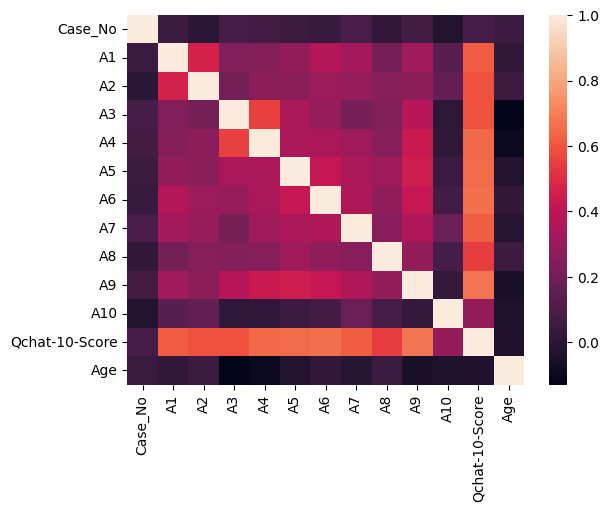

In [31]:
sns.heatmap(df.corr())

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, '194'), Text(0, 0, '534')]

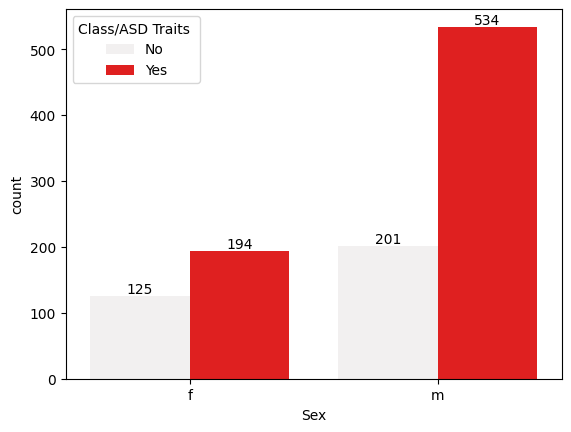

In [48]:
ax = sns.countplot(df['Sex'], hue=df['Class/ASD Traits '], color='red')
plt.bar_label(ax.containers[0])
plt.bar_label(ax.containers[1])


Inference

* A high percentage of the diagnosed toddlers are males with the ASD traits found

Text(0.5, 1.0, 'COUNT BY ETHNICITY')

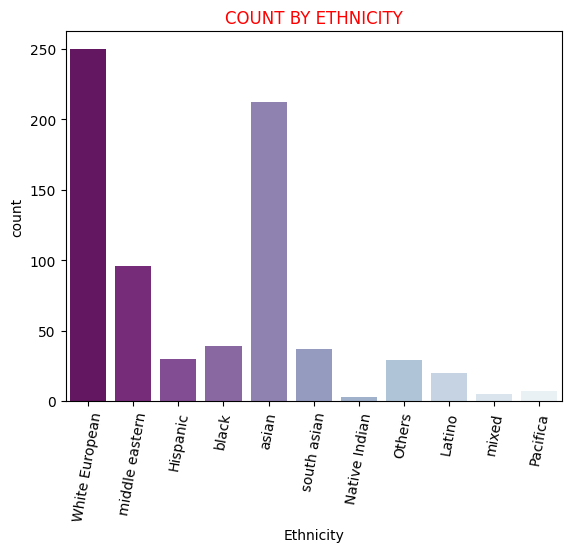

In [103]:
sns.countplot(data=df[df['Class/ASD Traits '] == 'Yes'], x='Ethnicity', palette='BuPu_r')
plt.xticks(rotation=80)
plt.title('COUNT BY ETHNICITY', color='red')

Inference

* The graph shows that White European kids are more likely to suffer from ASD than other ethnicities compared to the rest while the Pacifica the least

In [75]:
jaundice = df[df['Jaundice'] == 'yes']

Text(0.5, 1.0, 'JAUNDICE PATEINTS ASD TRAITS PERCENT (%)')

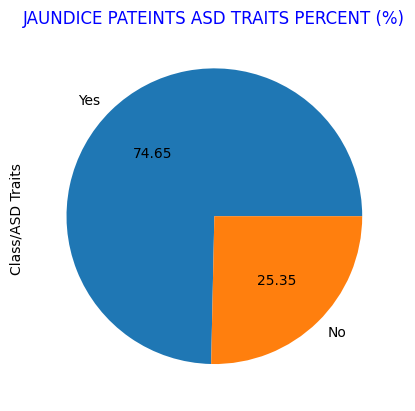

In [81]:
jaundice['Class/ASD Traits '].value_counts().plot(kind='pie', autopct='%.2f')
plt.title('JAUNDICE PATEINTS ASD TRAITS PERCENT (%)', color='blue')

Inference

* 75% of jaundice patients from the dataset are diagnosed with ASD traits

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'ASD/TRAITS DISTRIBUTION AMONG QCHAT-10-SCORE')

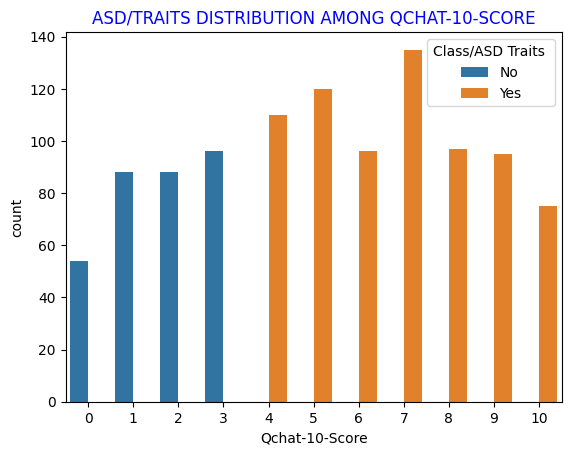

In [109]:
sns.countplot(df['Qchat-10-Score'], hue=df['Class/ASD Traits '])
plt.title('ASD/TRAITS DISTRIBUTION AMONG QCHAT-10-SCORE', color='blue')

Inference

* Patients with Qchat score >= 4 are diagnosed with ASD traits while those with Qchat score <4 were not diagnosed with COVID

Text(0.5, 1.0, 'DISTRIBUTION OF ETHNICITY BY PERCENTAGE')

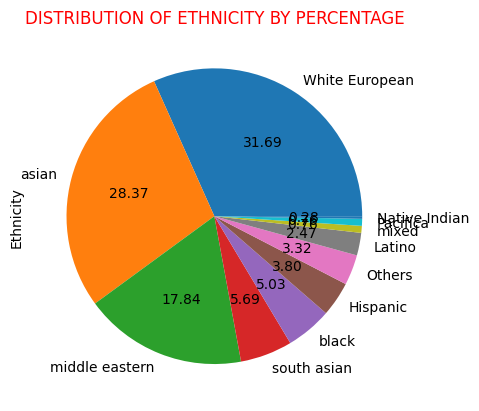

In [115]:
df['Ethnicity'].value_counts().plot(kind='pie', autopct='%.2f')
plt.title('DISTRIBUTION OF ETHNICITY BY PERCENTAGE', color='red')

Here, a column 'poss_fam_trait' (Possible family Trait) is created where a toddler and family member are both diagnosed with ASD traits

In [166]:
df['Family_mem_with_ASD'].replace('yes', 'Yes')
df['poss_fam_trait'] = np.where((df['Class/ASD Traits '] == 'Yes') & (df['Family_mem_with_ASD'] == 'Yes'), 'Yes', 'No')    

Text(0.5, 1.0, 'PIE CHART OF POSSIBLE FAMILY TRAIT')

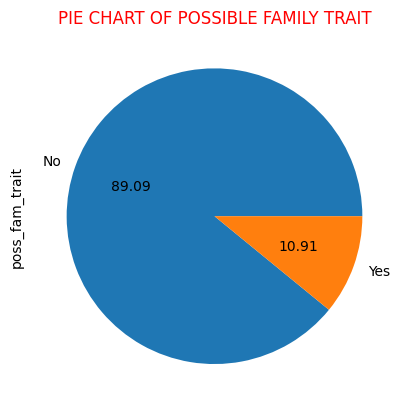

In [170]:
df['poss_fam_trait'].value_counts().plot(kind='pie', autopct='%.2f')
plt.title('PIE CHART OF POSSIBLE FAMILY TRAIT', color='red')

Inference

* The chart shows that roughly 11% of the toddlers share the ASD traits with a family member